<a href="https://colab.research.google.com/github/Dr-Mohamed-Elkholy/Machine-Learning-Projects/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron
You should build an end-to-end machine learning pipeline using a perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) model.
- Optimize your pipeline by cross-validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## 1. Loading the data

In [ ]:
# Importing libraies
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:


# Loading the dataset
mnist_data = pd.read_csv("mnist.csv")
mnist_data.head().T


,0,1,2,3,4
id,31953,34452,60897,36953,1981
class,5,8,5,0,3
pixel1,0,0,0,0,0
pixel2,0,0,0,0,0
pixel3,0,0,0,0,0
...,...,...,...,...,...
pixel780,0,0,0,0,0
pixel781,0,0,0,0,0
pixel782,0,0,0,0,0
pixel783,0,0,0,0,0


## 2. Preprocessing


In [ ]:
# Dropping the 'id' column
mnist_data = mnist_data.drop(columns=['id'])

# Splitting the dataset
X = mnist_data.drop(columns=['class'])
y = mnist_data['class']



## Split the dataset into training and test sets

In [ ]:


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Displaying the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3200, 784), (800, 784), (3200,), (800,))

## optimize using the GridSearch -  cross validation

In [ ]:


# Defining the hyperparameters grid to search
param_grid = {
    'perceptron__max_iter': [10, 50, 100, 200],
    'perceptron__eta0': [0.0001, 0.001, 0.01, 0.1]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('perceptron', Perceptron())
])

# Setting up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)

# Fitting
grid_search.fit(X_train, y_train)

# Extracting the best hyperparameters
best_params = grid_search.best_params_

print(best_params)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


## Build machine learning pipeline

will use the 'StandardScaler' to scale pixel values

In [ ]:


# Setting up the pipeline with preprocessing and the Perceptron model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('perceptron', Perceptron(eta0=0.1, max_iter=50))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Confirmation message
"Pipeline has been doooooone"


'Pipeline has been doooooone'

## Test on the data set

In [ ]:


# Predicting
y_pred = pipeline.predict(X_test)

# Calculating the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy is ' , test_accuracy)


# Converting the classification report into a DataFrame
report_df = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).T

# Rounding 2
report_df = report_df.round(2)

print(report_df)


The test accuracy is  0.82875
              precision  recall  f1-score  support
0                  0.94    0.94      0.94    70.00
1                  0.93    0.85      0.89   100.00
2                  0.76    0.79      0.78    73.00
3                  0.85    0.79      0.82    86.00
4                  0.82    0.92      0.87    80.00
5                  0.67    0.67      0.67    64.00
6                  0.83    0.88      0.85    90.00
7                  0.86    0.90      0.88    67.00
8                  0.78    0.79      0.78    94.00
9                  0.81    0.74      0.77    76.00
accuracy           0.83    0.83      0.83     0.83
macro avg          0.83    0.83      0.83   800.00
weighted avg       0.83    0.83      0.83   800.00


## Visualizing the results on heatmap

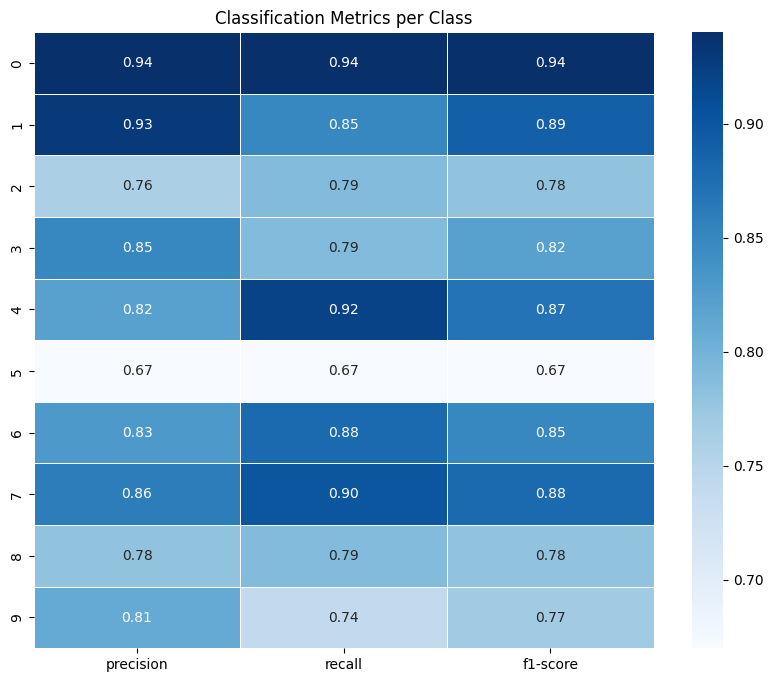

In [ ]:

# Defining which on the heatmap
heatmap_data = report_df.iloc[:-3, :-1]  # Excluding 'support' and average values for simplicity

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Classification Metrics per Class")
plt.show()


# MLPClassifier

In [ ]:


# Setting up and training the MLPClassifier
mlp_class = MLPClassifier(max_iter=600, hidden_layer_sizes=(400,))
mlp_class.fit(X_train, y_train)

# Predicting
mlp_pred = mlp_class.predict(X_test)

# classification report
mlp_report = classification_report(y_test, mlp_pred, output_dict=True)

# Converting the classification report into a DataFrame
mlp_report_df = pd.DataFrame(mlp_report).T.round(2)



In [ ]:
print(mlp_report_df)

              precision  recall  f1-score  support
0                  0.93    0.97      0.95    70.00
1                  0.93    0.93      0.93   100.00
2                  0.86    0.75      0.80    73.00
3                  0.83    0.80      0.82    86.00
4                  0.87    0.84      0.85    80.00
5                  0.71    0.75      0.73    64.00
6                  0.87    0.92      0.90    90.00
7                  0.84    0.85      0.84    67.00
8                  0.83    0.82      0.82    94.00
9                  0.77    0.80      0.79    76.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.84    0.84      0.84   800.00
weighted avg       0.85    0.85      0.85   800.00
